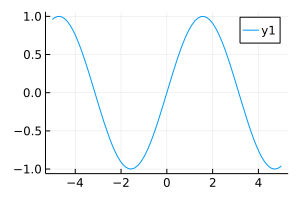

In [1]:
using Distributions
using Plots
plot(sin; size=(300, 200))

In [2]:
x ⪅ y = x < y || x ≈ y

function pval(k; n, θ)
    bin = Binomial(n, θ)
    pk = pdf(bin, k)
    sum(pdf(bin, k′) for k′ ∈ support(bin) if pdf(bin, k′) ⪅ pk)
end

pval (generic function with 1 method)

In [10]:
[(k = k, P = pdf(Binomial(10, 0.3), k)) for k in 0:10]

11-element Vector{NamedTuple{(:k, :P), Tuple{Int64, Float64}}}:
 (k = 0, P = 0.028247524900000005)
 (k = 1, P = 0.12106082100000018)
 (k = 2, P = 0.23347444049999988)
 (k = 3, P = 0.2668279320000006)
 (k = 4, P = 0.20012094900000013)
 (k = 5, P = 0.10291934520000003)
 (k = 6, P = 0.03675690899999997)
 (k = 7, P = 0.009001692000000018)
 (k = 8, P = 0.0014467004999999982)
 (k = 9, P = 0.00013778100000000015)
 (k = 10, P = 5.904899999999995e-6)

In [ ]:
@show bin = Binomial(10, 0.3)
@show pdf(bin, 0) + pdf(bin, 6) + pdf(bin, 7) + pdf(bin, 8) + pdf(bin, 9) + pdf(bin, 10)

In [3]:
[(k = k, pvalue = pval(k; n=10, θ=0.3)) for k in 0:10]

11-element Vector{NamedTuple{(:k, :pvalue), Tuple{Int64, Float64}}}:
 (k = 0, pvalue = 0.03883960330000002)
 (k = 1, pvalue = 0.2995766785000002)
 (k = 2, pvalue = 0.733172068)
 (k = 3, pvalue = 1.0000000000000007)
 (k = 4, pvalue = 0.4996976275000003)
 (k = 5, pvalue = 0.1785158575)
 (k = 6, pvalue = 0.0755965123)
 (k = 7, pvalue = 0.010592078400000015)
 (k = 8, pvalue = 0.0015903863999999985)
 (k = 9, pvalue = 0.00014368590000000015)
 (k = 10, pvalue = 5.904899999999995e-6)

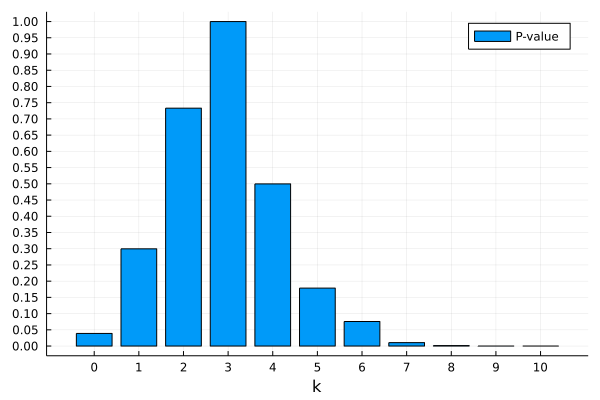

In [4]:
k = 0:10
p = pval.(k; n=10, θ=0.3)
bar(k, p; xtick=k, ytick=0:0.05:1, xlabel="k", label="P-value")

In [5]:
[(θ₀ = θ₀, pvalue = pval(3; n=10, θ=θ₀)) for θ₀ in 0:0.1:1]

11-element Vector{NamedTuple{(:θ₀, :pvalue), Tuple{Float64, Float64}}}:
 (θ₀ = 0.0, pvalue = 0.0)
 (θ₀ = 0.1, pvalue = 0.07019082640000021)
 (θ₀ = 0.2, pvalue = 0.4295746560000005)
 (θ₀ = 0.3, pvalue = 1.0000000000000007)
 (θ₀ = 0.4, pvalue = 0.749177344000001)
 (θ₀ = 0.5, pvalue = 0.3437500000000008)
 (θ₀ = 0.6, pvalue = 0.10111928320000016)
 (θ₀ = 0.7, pvalue = 0.010592078400000019)
 (θ₀ = 0.8, pvalue = 0.0008643583999999999)
 (θ₀ = 0.9, pvalue = 9.121600000000018e-6)
 (θ₀ = 1.0, pvalue = 0.0)

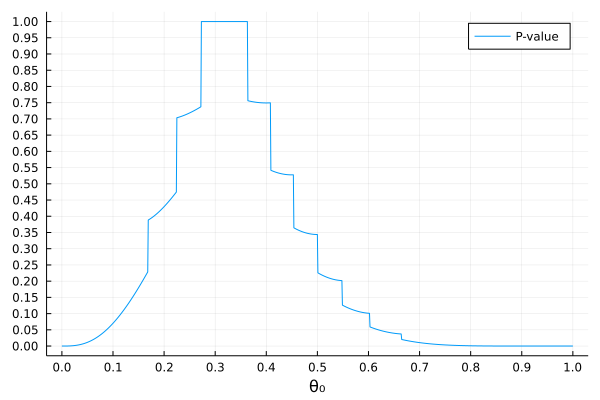

In [6]:
θ₀ = 0:0.001:1
p = (θ₀ -> pval(3; n=10, θ=θ₀)).(θ₀)
plot(θ₀, p; xtick=0:0.1:1, ytick=0:0.05:1, xlabel="θ₀", label="P-value")